In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
data=pd.read_csv('D:\项目\机器学习数据作业\\data\\ex1data1.txt',names=['population','profit'])

data.head()

population   profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233

In [5]:
data.tail()

population   profit
92      5.8707  7.20290
93      5.3054  1.98690
94      8.2934  0.14454
95     13.3940  9.05510
96      5.4369  0.61705

In [7]:
data.describe()

population     profit
count   97.000000  97.000000
mean     8.159800   5.839135
std      3.869884   5.510262
min      5.026900  -2.680700
25%      5.707700   1.986900
50%      6.589400   4.562300
75%      8.578100   7.046700
max     22.203000  24.147000

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


<Axes: xlabel='population', ylabel='profit'>

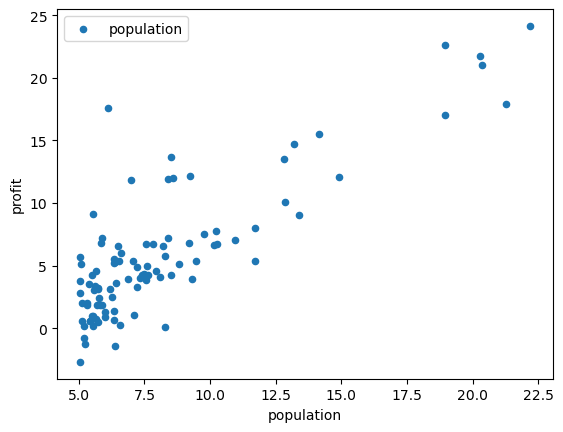

In [11]:
data.plot.scatter('population','profit',label='population')
#数据可视化

In [12]:
data.insert(0,'ones',1)
#向第一列插入一列数字1。
data.head()

ones  population   profit
0     1      6.1101  17.5920
1     1      5.5277   9.1302
2     1      8.5186  13.6620
3     1      7.0032  11.8540
4     1      5.8598   6.8233

In [15]:
X=data.iloc[:,0:-1]
#第一个：前后表示行,第二个表示列。从第一列到最后一列切片,-1是指倒数第一列。
X.head()

ones  population
0     1      6.1101
1     1      5.5277
2     1      8.5186
3     1      7.0032
4     1      5.8598

In [17]:
y=data.iloc[:,-1]
y.head()

0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: profit, dtype: float64

In [19]:
X=X.values
X.shape
#检查维度。

(97, 2)

In [21]:
y=y.values
y.shape

(97,)

In [67]:
y=y.reshape(97,1)
y.shape

(97, 1)

In [69]:
def costFunction(X,y,theta):
    #创造函数，并传入参数。
    inner=np.power(X@theta-y,2)
    return np.sum(inner)/(2*len(X))

In [71]:
theta=np.zeros((2,1))
theta.shape

(2, 1)

In [73]:
cost_init=costFunction(X,y,theta)
print(cost_init)

32.072733877455676


In [75]:
def gradientDescent(X,y,theta,alpha,iters):
    costs=[]
    for i in range(iters):
        theta-=(X.T@(X@theta-y))*alpha/len(X)
        cost=costFunction(X,y,theta)
        costs.append(cost)
        if i%100==0:
            print(cost)
    return theta,costs

In [77]:
alpha=0.02
iters=2000
theta,costs=gradientDescent(X,y,theta,alpha,iters)

16.76964237166745
5.170668092303259
4.813840215803055
4.640559602034057
4.556412109403549
4.5155489085988645
4.495705166048674
4.486068766778817
4.481389196347322
4.479116731414093
4.478013190619409
4.477477295755764
4.477217057705424
4.477090682463859
4.477029312876824
4.476999510945953
4.476985038710984
4.476978010791016
4.476974597934662
4.476972940603823


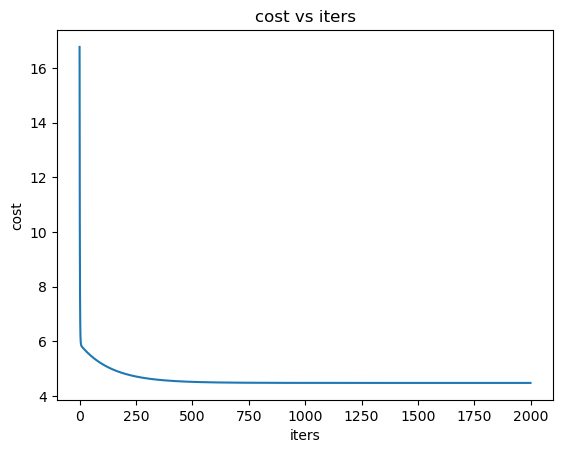

In [79]:
fig,ax=plt.subplots()
#括号里面是行列,用，隔开。
ax.plot(np.arange(iters),costs)
ax.set(xlabel='iters',
       ylabel='cost',
       title='cost vs iters')
plt.show()

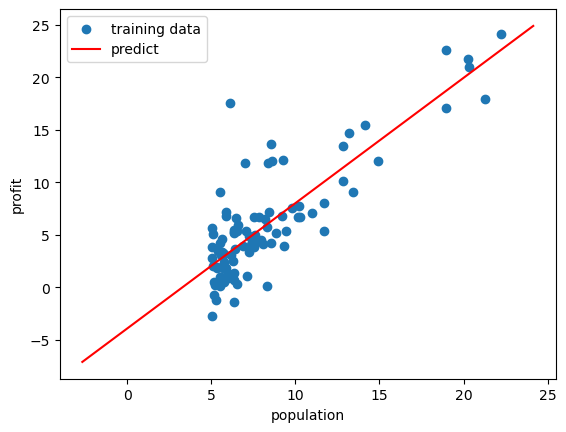

In [81]:

x=np.linspace(y.min(),y.max(),100)
y_=theta[0,0]+theta[1,0]*x
fig,ax=plt.subplots()
ax.scatter(X[:,1],y,label='training data')
ax.plot(x,y_,'r',label='predict')
ax.legend()
ax.set(xlabel='population',
       ylabel='profit')
plt.show()